In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# Load the phishing_data
phishing_data_path = '/content/drive/MyDrive/Colab Notebooks/phishing_dataset.csv'
phishing_data = pd.read_csv(phishing_data_path)

In [37]:
phishing_data.head()

,gender,age,education_level,occupation,annual_income,past_phishing_exposure,susceptibility_to_Future_attacks,date_of_phishing,location,device_type,internet_usage_hours,social_media_usage_hours,privacy_concerns
0,Female,30,Bachelor's Degree,Self-Employed,24353,Yes,Yes,26/08/2015,Suburban,Tablet,15,12,3
1,Male,49,High School Diploma,Employed,54207,Yes,Yes,12/12/2013,Rural,Tablet,3,11,1
2,Female,47,Other,Retired,59812,Yes,No,17/05/2013,Urban,Desktop,18,7,4
3,Male,58,PhD,Self-Employed,80243,Yes,Yes,25/04/2014,Urban,Tablet,4,15,3
4,Male,49,High School Diploma,Unemployed,80781,Yes,Yes,24/05/2012,Urban,Laptop,15,8,5


### Descriptive Statistics

In [38]:
phishing_data.describe()

,age,annual_income,internet_usage_hours,social_media_usage_hours,privacy_concerns
count,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,41.494000,59273.050000,9.36200,8.70800,2.939000
std,13.975811,23758.091512,5.19923,4.64697,1.426644
min,18.000000,20012.000000,1.00000,1.00000,1.000000
25%,29.000000,38613.750000,5.00000,5.00000,2.000000
50%,41.000000,58618.500000,9.00000,9.00000,3.000000
75%,54.000000,80347.500000,14.00000,13.00000,4.000000
max,65.000000,99980.000000,18.00000,16.00000,5.000000


In [39]:
 # Encoding categorical columns
label_encoders = {}
categorical_columns = ['gender', 'education_level', 'occupation', 'device_type', 'location', 'past_phishing_exposure', 'susceptibility_to_Future_attacks']
for col in categorical_columns:
  if col in phishing_data.columns:
    le = LabelEncoder()
    phishing_data[col] = le.fit_transform(phishing_data[col])
    label_encoders[col] = le

In [40]:

# Check for missing values in each column
missing_values = phishing_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Delete rows with missing values
phishing_data_cleaned = phishing_data.dropna()


Missing values in each column:
 gender                              0
age                                 0
education_level                     0
occupation                          0
annual_income                       0
past_phishing_exposure              0
susceptibility_to_Future_attacks    0
date_of_phishing                    0
location                            0
device_type                         0
internet_usage_hours                0
social_media_usage_hours            0
privacy_concerns                    0
dtype: int64


### Exploratory Data Analysis

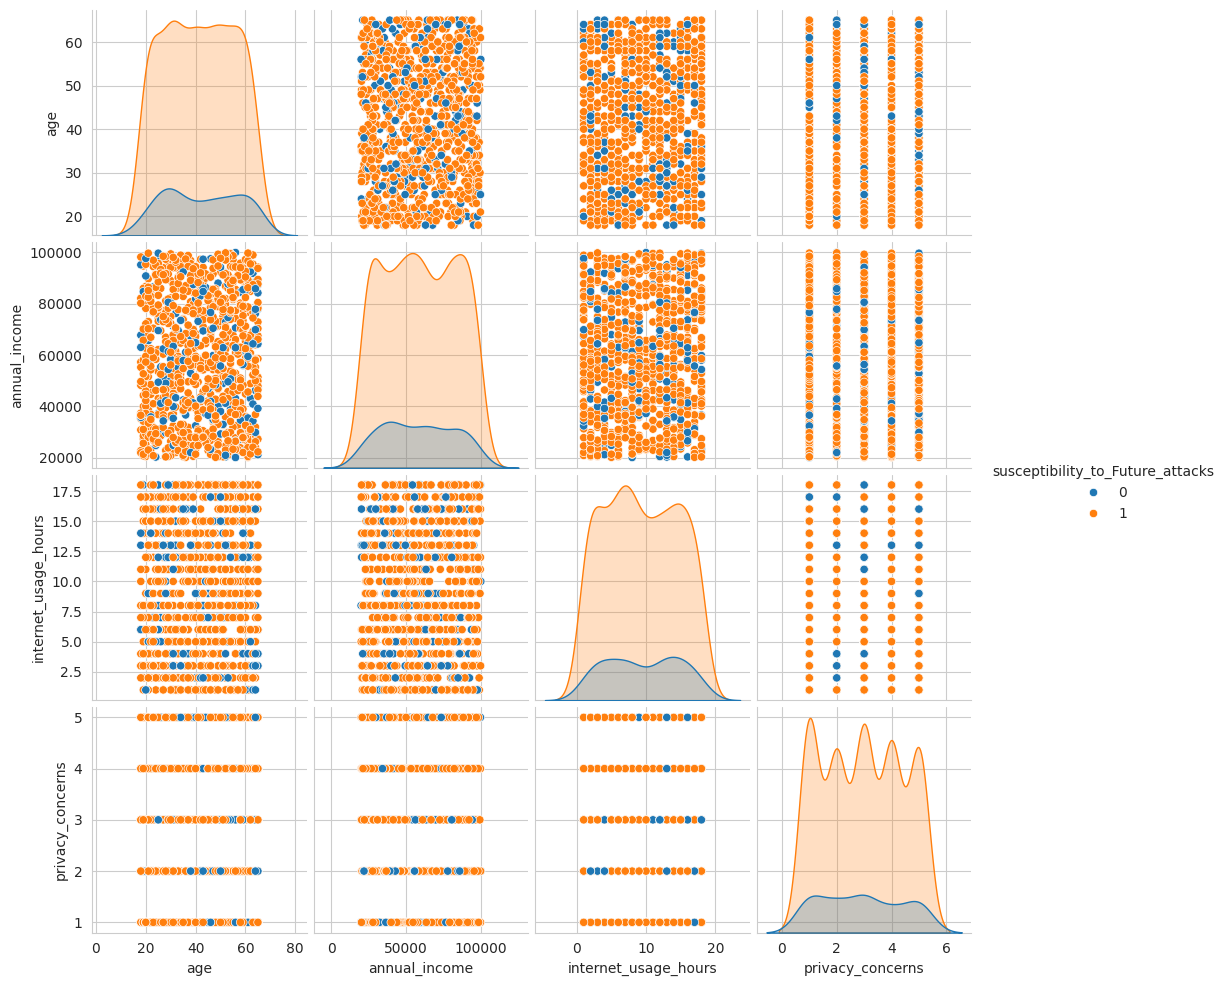

In [41]:

# Pairplot to visualize the distributions and relationships
sns.pairplot(phishing_data, vars=['age', 'annual_income', 'internet_usage_hours', 'privacy_concerns'], hue='susceptibility_to_Future_attacks')

plt.show()

In [42]:
 # Define features and target
features = ['past_phishing_exposure', 'age', 'gender', 'education_level', 'occupation', 'annual_income']
target = 'susceptibility_to_Future_attacks'

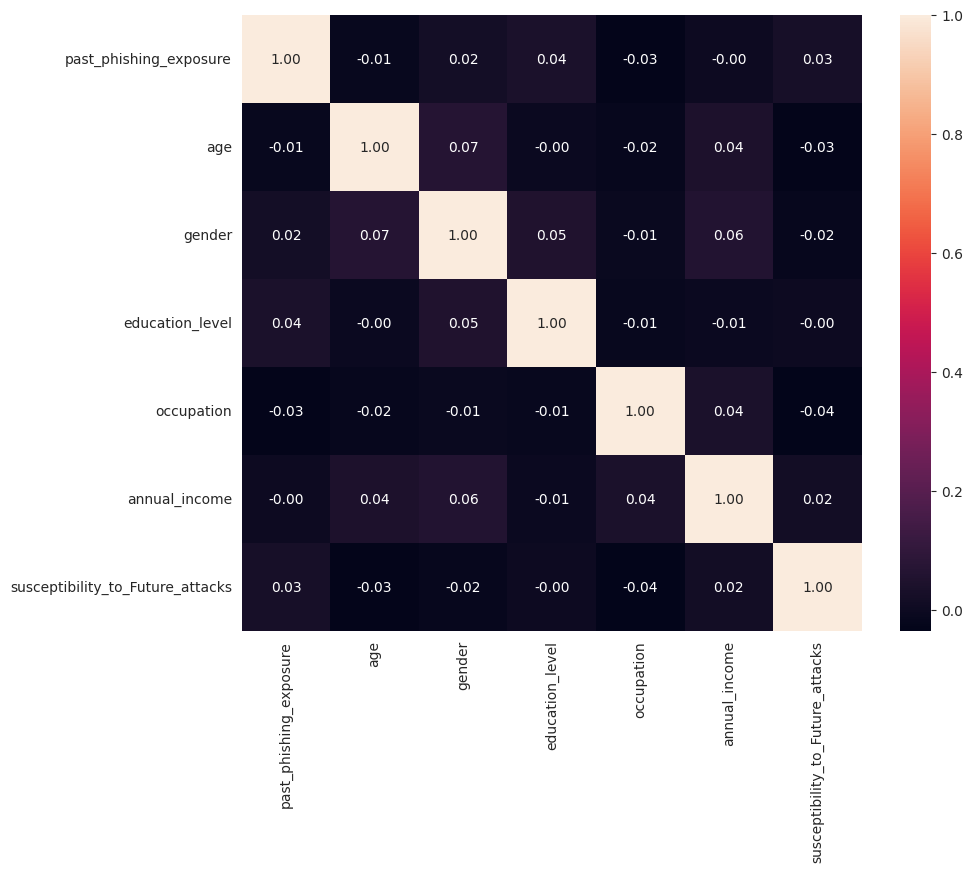

In [43]:
# Heatmap of the correlations
#correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(phishing_data[features + [target]].corr(), annot=True, fmt=".2f")
plt.show()

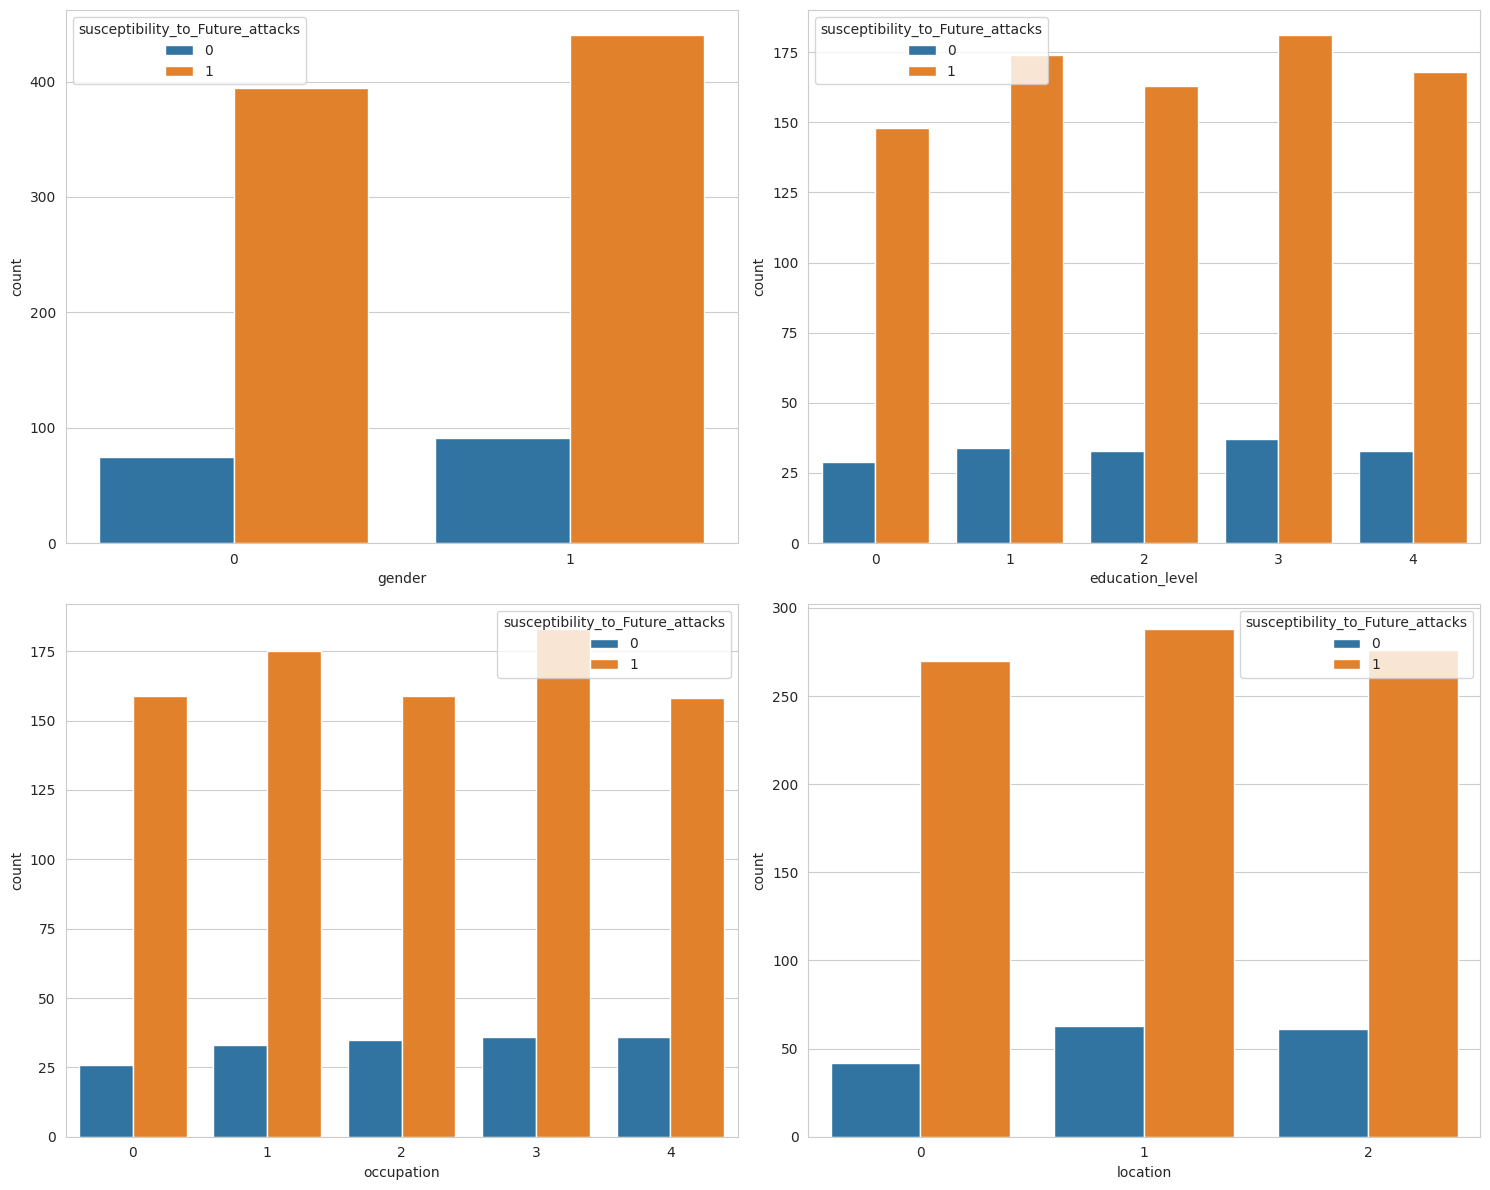

In [44]:
#Count plots for categorical variables
fig, ax = plt.subplots(2, 2, figsize=(15, 12))
sns.countplot(x='gender', hue='susceptibility_to_Future_attacks', data=phishing_data, ax=ax[0, 0])
sns.countplot(x='education_level', hue='susceptibility_to_Future_attacks',data=phishing_data, ax=ax[0, 1])
sns.countplot(x='occupation', hue='susceptibility_to_Future_attacks', data=phishing_data, ax=ax[1, 0])
sns.countplot(x='location', hue='susceptibility_to_Future_attacks', data=phishing_data, ax=ax[1, 1])
plt.tight_layout()
plt.show()

### Training and Testing

In [45]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(phishing_data[features], phishing_data[target], test_size=0.2, random_state=42)

In [46]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Building

In [47]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
dt_preds = decision_tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))

Decision Tree Accuracy: 0.75


In [48]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))

SVM Accuracy: 0.855


In [49]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
rf_preds = random_forest.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

Random Forest Accuracy: 0.85


In [50]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))

XGBoost Accuracy: 0.825


In [51]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_preds))

Logistic Regression Accuracy: 0.855


In [52]:
# Comparing model performances
print("Classification Report for Decisiontree classifier:")
print(classification_report(y_test, dt_preds,zero_division=0))

print("Classification Report for SVC:")
print(classification_report(y_test, svm_preds,zero_division=0))

print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_preds,zero_division=0))

print("Classification Report for XGBoost:")
print(classification_report(y_test, xgb_preds,zero_division=0))

print("Classification Report for logistic regression:")
print(classification_report(y_test, log_reg_preds,zero_division=0))

Classification Report for Decisiontree classifier:
              precision    recall  f1-score   support

           0       0.20      0.24      0.22        29
           1       0.87      0.84      0.85       171

    accuracy                           0.75       200
   macro avg       0.53      0.54      0.53       200
weighted avg       0.77      0.75      0.76       200

Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.85      1.00      0.92       171

    accuracy                           0.85       200
   macro avg       0.43      0.50      0.46       200
weighted avg       0.73      0.85      0.79       200

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.33      0.03      0.06        29
           1       0.86      0.99      0.92       171

    accuracy                           0.85       200
   ma

### Confusion Matrix

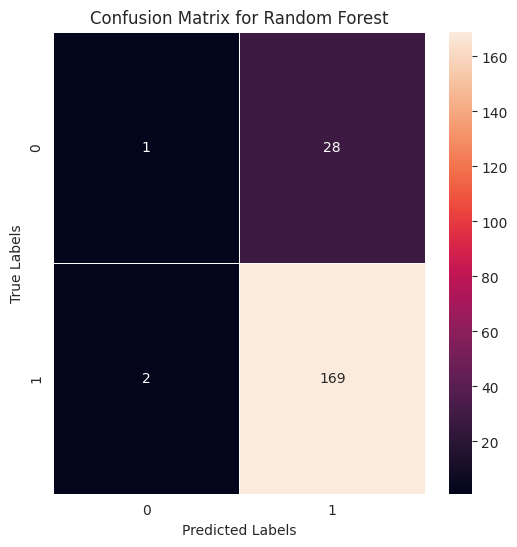

In [53]:
# Model result visualization
## Confusion Matrix for the best model
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt="d", linewidths=.5)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

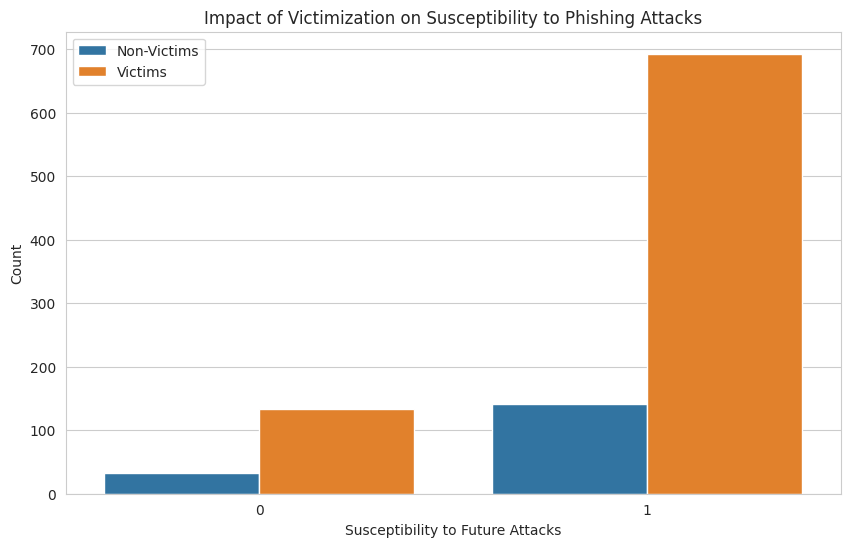

In [54]:
# Create subsets based on past phishing exposure
phishing_victims = phishing_data[phishing_data['past_phishing_exposure'] == 1]
non_victims = phishing_data[phishing_data['past_phishing_exposure'] == 0]

# Plotting the impact of victimization on susceptibility to future attacks
plt.figure(figsize=(10, 6))
sns.countplot(x='susceptibility_to_Future_attacks', hue='past_phishing_exposure', data=phishing_data)
plt.title('Impact of Victimization on Susceptibility to Phishing Attacks')
plt.xlabel('Susceptibility to Future Attacks')
plt.ylabel('Count')
plt.legend(['Non-Victims', 'Victims'])
plt.show()


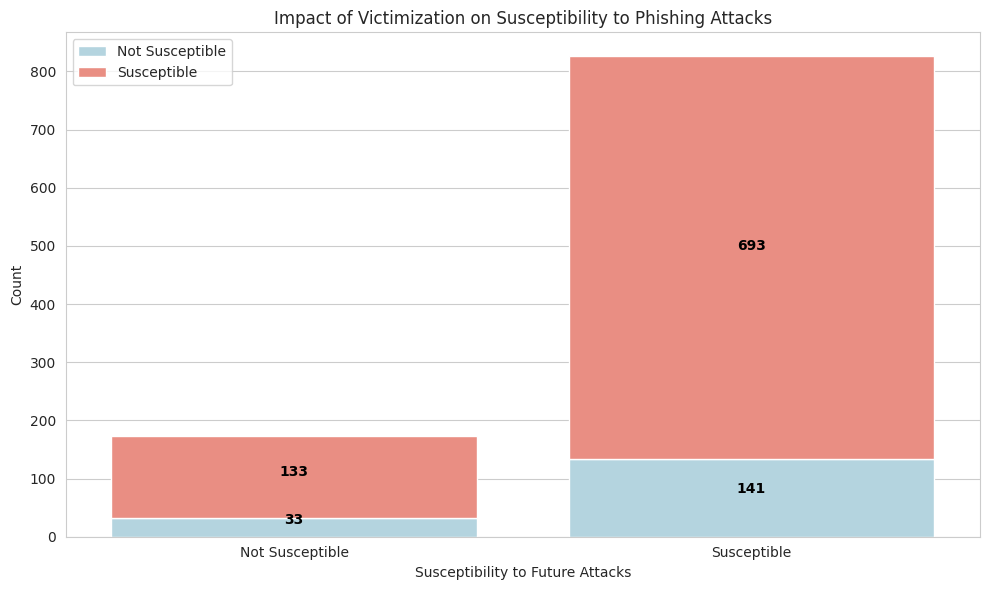

In [55]:


# Create subsets based on past phishing exposure
phishing_victims = phishing_data[phishing_data['past_phishing_exposure'] == 1]
non_victims = phishing_data[phishing_data['past_phishing_exposure'] == 0]

# Count susceptibility for victims and non-victims
victim_counts = phishing_victims['susceptibility_to_Future_attacks'].value_counts().sort_index()
non_victim_counts = non_victims['susceptibility_to_Future_attacks'].value_counts().sort_index()

# Create a stacked bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(x=[0, 1], y=[non_victim_counts[0], victim_counts[0]], color='lightblue', label='Not Susceptible')
sns.barplot(x=[0, 1], y=[non_victim_counts[1], victim_counts[1]], bottom=[non_victim_counts[0], victim_counts[0]], color='salmon', label='Susceptible')

# Annotate bars with counts
for i, count in enumerate(non_victim_counts):
    plt.text(i, count/2, str(count), ha='center', va='bottom', color='black', fontweight='bold')
for i, count in enumerate(victim_counts):
    plt.text(i, count/2 + non_victim_counts[i], str(count), ha='center', va='bottom', color='black', fontweight='bold')

plt.title('Impact of Victimization on Susceptibility to Phishing Attacks')
plt.xlabel('Susceptibility to Future Attacks')
plt.ylabel('Count')
plt.legend()
plt.xticks([0, 1], ['Not Susceptible', 'Susceptible'])
plt.tight_layout()
plt.show()
